In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
df=pd.read_excel('TUGAS ALANTURING-17 MARET 2022.xlsx', sheet_name='daataset')
df.head ()

,Credit Status,Gender,marital status,Age (years),Type of apartment,Occupation,number of dependants,Telephone,Foreign Worker,Account Balance,Duration of Credit (month),Credit Amount,Length of current employment (month),Instalment per cent
0,0,female,divorced,20,2,3,4,1,1,1,12,661,68,13.567270
1,1,female,single,54,2,3,6,2,1,4,24,741,82,11.333441
2,1,male,married,51,3,4,4,2,1,1,8,1158,90,18.619709
3,1,male,single,30,2,3,4,1,1,2,48,8365,6,34.802371
4,0,male,divorced,27,2,3,7,1,1,2,36,2797,9,17.894252


In [11]:
df.corr()

,Credit Status,Age (years),Type of apartment,Occupation,number of dependants,Telephone,Foreign Worker,Account Balance,Duration of Credit (month),Credit Amount,Length of current employment (month),Instalment per cent
Credit Status,1.000000,0.094800,0.004115,-0.052766,-0.049117,0.006232,0.060943,0.338315,-0.281404,-0.168679,0.090524,0.053272
Age (years),0.094800,1.000000,0.322104,0.122187,-0.119936,0.162182,-0.007656,0.078408,-0.036427,0.073003,0.330317,-0.032325
Type of apartment,0.004115,0.322104,1.000000,0.121641,-0.058249,0.117660,-0.081895,0.009581,0.116626,0.098361,0.168235,-0.101533
Occupation,-0.052766,0.122187,0.121641,1.000000,0.057611,0.421788,-0.065942,0.034283,0.189262,0.290746,0.097483,-0.055363
number of dependants,-0.049117,-0.119936,-0.058249,0.057611,1.000000,0.012092,-0.014743,-0.031384,0.039229,-0.008965,-0.115714,-0.089229
Telephone,0.006232,0.162182,0.117660,0.421788,0.012092,1.000000,-0.025122,0.079986,0.125747,0.273531,0.091433,-0.025753
Foreign Worker,0.060943,-0.007656,-0.081895,-0.065942,-0.014743,-0.025122,1.000000,-0.052188,-0.113074,0.016356,0.017990,0.074550
Account Balance,0.338315,0.078408,0.009581,0.034283,-0.031384,0.079986,-0.052188,1.000000,-0.116917,-0.060133,0.058574,-0.048454
Duration of Credit (month),-0.281404,-0.036427,0.116626,0.189262,0.039229,0.125747,-0.113074,-0.116917,1.000000,0.564599,0.062343,-0.004973
Credit Amount,-0.168679,0.073003,0.098361,0.290746,-0.008965,0.273531,0.016356,-0.060133,0.564599,1.000000,0.011659,0.354583


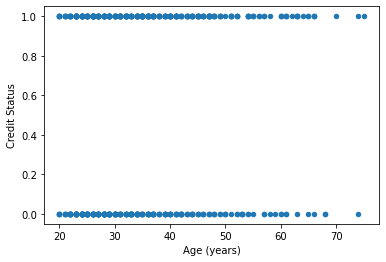

In [6]:
df.plot(kind = 'scatter', x = 'Age (years)', y = 'Credit Status')

plt.show()

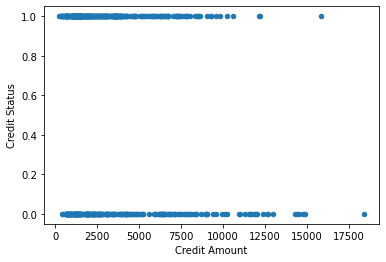

In [7]:
df.plot(kind = 'scatter', x = 'Credit Amount', y = 'Credit Status')

plt.show()

array([[<AxesSubplot:title={'center':'Credit Amount'}>]], dtype=object)

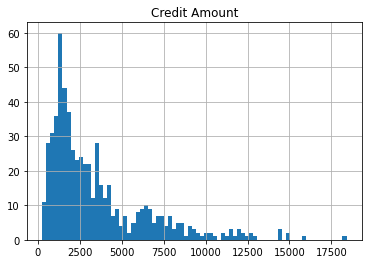

In [12]:
df.hist(column='Credit Amount', bins=75)

array([[<AxesSubplot:title={'center':'Duration of Credit (month)'}>]],
      dtype=object)

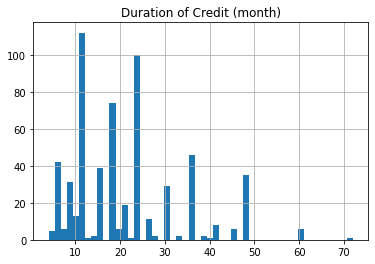

In [15]:
df.hist(column='Duration of Credit (month)', bins=50)

In [12]:
df['Foreign Worker'].value_counts()

1    581
2     19
Name: Foreign Worker, dtype: int64

In [13]:
df['Occupation'].value_counts()

3    371
2    119
4     98
1     12
Name: Occupation, dtype: int64

In [17]:
df['Credit Amount'].describe()

count      600.000000
mean      3492.395000
std       2978.695346
min        249.000000
25%       1365.000000
50%       2462.500000
75%       4435.250000
max      18408.000000
Name: Credit Amount, dtype: float64

In [18]:
df['Age (years)'].describe()

count    600.000000
mean      35.368333
std       11.196499
min       20.000000
25%       26.750000
50%       33.000000
75%       42.000000
max       75.000000
Name: Age (years), dtype: float64

In [20]:
df['Length of current employment (month)'].describe()

count    600.000000
mean      45.883333
std       37.178849
min        0.000000
25%       12.000000
50%       38.000000
75%       81.000000
max      120.000000
Name: Length of current employment (month), dtype: float64

In [21]:
df.columns

Index(['Credit Status', 'Gender', 'marital status', 'Age (years)',
       'Type of apartment', 'Occupation', 'number of dependants', 'Telephone',
       'Foreign Worker', 'Account Balance', 'Duration of Credit (month)',
       'Credit Amount', 'Length of current employment (month)',
       'Instalment per cent'],
      dtype='object')

In [23]:
X = df[['Age (years)', 'Duration of Credit (month)', 'Credit Amount', 'Length of current employment (month)',
       'Instalment per cent']].values
X[0:5]

array([[2.00000000e+01, 1.20000000e+01, 6.61000000e+02, 6.80000000e+01,
        1.35672703e+01],
       [5.40000000e+01, 2.40000000e+01, 7.41000000e+02, 8.20000000e+01,
        1.13334406e+01],
       [5.10000000e+01, 8.00000000e+00, 1.15800000e+03, 9.00000000e+01,
        1.86197090e+01],
       [3.00000000e+01, 4.80000000e+01, 8.36500000e+03, 6.00000000e+00,
        3.48023708e+01],
       [2.70000000e+01, 3.60000000e+01, 2.79700000e+03, 9.00000000e+00,
        1.78942522e+01]])

In [24]:
y = df[['Credit Status']].values
y [0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [25]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.37374689, -0.75928055, -0.95134182,  0.59536862, -0.98497832],
       [ 1.66545022,  0.22626478, -0.92446201,  0.972241  , -1.22218833],
       [ 1.39728577, -1.08779567, -0.78435103,  1.18759664, -0.44846066],
       [-0.47986539,  2.19735546,  1.6371834 , -1.07363761,  1.26997361],
       [-0.74802984,  1.21181012, -0.23365103, -0.99287925, -0.52549681]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (480, 5) (480, 1)
Test set: (120, 5) (120, 1)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
k = 11
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [33]:
yhat = knn.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7166666666666667
Test set Accuracy:  0.7166666666666667


In [50]:
import numpy as np
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\micha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.6       , 0.55      , 0.59166667, 0.54166667, 0.60833333,
       0.56666667, 0.64166667, 0.64166667, 0.68333333, 0.675     ,
       0.71666667, 0.69166667, 0.70833333, 0.7       ])

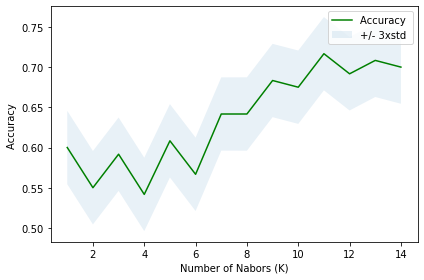

In [51]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [36]:
df1=pd.read_excel('TUGAS ALANTURING-17 MARET 2022.xlsx', sheet_name='submission')
df1.head ()

,ID,Credit Status,Gender,marital status,Age (years),Type of apartment,Occupation,number of dependants,Telephone,Foreign Worker,Account Balance,Duration of Credit (month),Credit Amount,Length of current employment (month),Instalment per cent
0,1,NaN,male,married,28,2,3,6,2,1,4,24,2281,56,14.825283
1,2,NaN,male,married,35,2,3,7,2,1,4,9,2741,99,15.707986
2,3,NaN,male,married,24,3,3,3,1,1,1,48,4594,82,18.028008
3,4,NaN,male,single,23,2,3,7,1,1,4,18,1929,1,12.714246
4,5,NaN,male,married,23,2,3,5,2,1,2,48,15721,22,26.431045


In [37]:
X1 = df1[['Age (years)', 'Duration of Credit (month)', 'Credit Amount', 'Length of current employment (month)',
       'Instalment per cent']].values
X1[0:5]

array([[2.80000000e+01, 2.40000000e+01, 2.28100000e+03, 5.60000000e+01,
        1.48252828e+01],
       [3.50000000e+01, 9.00000000e+00, 2.74100000e+03, 9.90000000e+01,
        1.57079864e+01],
       [2.40000000e+01, 4.80000000e+01, 4.59400000e+03, 8.20000000e+01,
        1.80280079e+01],
       [2.30000000e+01, 1.80000000e+01, 1.92900000e+03, 1.00000000e+00,
        1.27142465e+01],
       [2.30000000e+01, 4.80000000e+01, 1.57210000e+04, 2.20000000e+01,
        2.64310455e+01]])

In [38]:
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
X1[0:5]

array([[-0.61135613,  0.39345387, -0.31725941,  0.22360997, -0.77005832],
       [ 0.11031215, -1.04250916, -0.14490098,  1.36828004, -0.66769553],
       [-1.023738  ,  2.69099472,  0.54940374,  0.91573605, -0.39865408],
       [-1.12683347, -0.18093134, -0.44915108, -1.24050291, -1.0148648 ],
       [-1.12683347,  2.69099472,  4.7186043 , -0.68147799,  0.57580477]])

In [59]:
y1 = knn.predict(X1)
y1

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [60]:
dfnew=pd.DataFrame(y1)
dfnew.to_excel('sub.xlsx')

In [61]:
dfnew=pd.DataFrame(y1)
dfnew.to_csv('sub.csv')